In [1]:
# -*- coding: utf-8 -*-
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import pandas as pd
import tensorflow as tf
import os

Using TensorFlow backend.


In [6]:

# OBJECT_NAME = 'NASNetLarge_model_12_27-1checkpoint-11e-val_acc_0.95'

# MODEL_PATH = 'E:/git/3rd-ML100Days/D101-103/checkpoint/'+OBJECT_NAME+'.hdf5'

OBJECT_NAME = 'NASNetLarge_model_12_27-1'

MODEL_PATH = 'E:/git/3rd-ML100Days/D101-103/'+OBJECT_NAME+'.h5'

# 影像大小
IMAGE_SIZE = (331, 331)


# # 模型輸出儲存的檔案
# WEIGHTS_FINAL = OBJECT_NAME+'.h5'


CSV_NAME = OBJECT_NAME+'.csv';

CSV_PRE_NAME = OBJECT_NAME+'_pre.csv';

# 資料路徑
DATASET_PATH  = 'E:/git/3rd-ML100Days/D101-103/ml100-03-final/image_data/test/'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto(allow_soft_placement=True)

#最多占gpu资源的70%
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.6)

#开始不会给tensorflow全部gpu资源 而是按需增加
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [7]:
net = load_model(MODEL_PATH,compile=False)

    0.001  daisy
    0.000  dandelion
    0.001  rose
    0.997  sunflower
    0.001  tulip


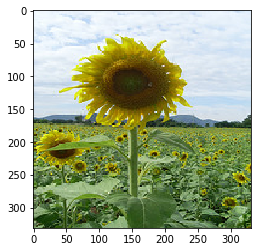

In [4]:
filenames = os.listdir(DATASET_PATH)
sample = random.choice(filenames)

img = load_img(DATASET_PATH+sample,target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))


# aaaaa = 'E:/S__17891411.jpg'
# img = load_img(aaaaa,target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))


cls_list = ['daisy', 'dandelion','rose','sunflower','tulip']
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
# x = x/255
pred = net.predict(x)[0]
result = pred.argmax()
plt.imshow(img)
# print (file.replace('.jpg', ''))
# print (result)
print('    {:.3f}  {}'.format(pred[0], cls_list[0]))
print('    {:.3f}  {}'.format(pred[1], cls_list[1]))
print('    {:.3f}  {}'.format(pred[2], cls_list[2]))
print('    {:.3f}  {}'.format(pred[3], cls_list[3]))
print('    {:.3f}  {}'.format(pred[4], cls_list[4]))

In [8]:
files = os.listdir(DATASET_PATH)
# cls_list = ['daisy', 'dandelion','rose','sunflower','tulip']
ids =[]
rf_pred =[]

daisys=[]
dandelions=[]
roses=[]
sunflowers=[]
tulips=[]
for file in files:
    img = load_img(DATASET_PATH+file,target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
#     x = x/255
    pred = net.predict(x)[0]
    
#     maxElement = np.amax(pred)
    result = pred.argmax()
    
    ids.append(file.replace('.jpg', ''))
    rf_pred.append(result)
    daisys.append(pred[0])
    dandelions.append(pred[1])
    roses.append(pred[2])
    sunflowers.append(pred[3])
    tulips.append(pred[4])
#     print (file.replace('.jpg', ''))
#     print (result)
#     print('    {:.3f}  {}'.format(pred[0], cls_list[0]))
#     print('    {:.3f}  {}'.format(pred[1], cls_list[1]))
#     print('    {:.3f}  {}'.format(pred[2], cls_list[2]))
#     print('    {:.3f}  {}'.format(pred[3], cls_list[3]))
#     print('    {:.3f}  {}'.format(pred[4], cls_list[4]))
    
sub = pd.DataFrame({'id': ids, 'flower_class': rf_pred})
sub.to_csv(CSV_NAME, index=False)

sub_pre = pd.DataFrame({'id': ids,'flower_class': rf_pred,'daisys': daisys,'dandelions': dandelions,'roses': roses,'sunflowers': sunflowers,'tulips': tulips})
sub_pre.to_csv(CSV_PRE_NAME, index=False)

In [ ]:
# files = os.listdir(DATASET_PATH)
# ids =[]
# daisys=[]
# dandelions=[]
# roses=[]
# sunflowers=[]
# tulips=[]
# for file in files:
#     img = load_img(DATASET_PATH+file,target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis = 0)
#     x = x/255
#     pred = net.predict(x)[0]
    
    

    
#     ids.append(file.replace('.jpg', ''))
#     daisys.append(pred[0])
#     dandelions.append(pred[1])
#     roses.append(pred[2])
#     sunflowers.append(pred[3])
#     tulips.append(pred[4])
# #     print (file.replace('.jpg', ''))
# #     print (result)
# #     print('    {:.3f}  {}'.format(pred[0], cls_list[0]))
# #     print('    {:.3f}  {}'.format(pred[1], cls_list[1]))
# #     print('    {:.3f}  {}'.format(pred[2], cls_list[2]))
# #     print('    {:.3f}  {}'.format(pred[3], cls_list[3]))
# #     print('    {:.3f}  {}'.format(pred[4], cls_list[4]))
    
# sub = pd.DataFrame({'id': ids,'daisys': daisys,'dandelions': dandelions,'roses': roses,'sunflowers': sunflowers,'tulips': tulips})
# sub.to_csv(CSV_PRE_NAME, index=False)